In [1]:
%run ../../data/api_keys.ipynb
%run ../modulos.ipynb

In [4]:
repos_df = pd.read_csv('../../data/primer_intento.csv')

In [37]:
repos_df.stargazers.describe()

count     50.000000
mean     709.400000
std       17.930706
min      698.000000
25%      701.000000
50%      703.000000
75%      712.750000
max      802.000000
Name: stargazers, dtype: float64

In [6]:
repos_df.head()

,ids,name_repo,stargazers,watchers,languages,forks,tamaño_kb,issues,network_size,star_q1,star_gq2,star_gq3,star_gq4,fork_q1,fork_gq2,fork_gq3,fork_gq4
0,25413198,https://github.com/goburrow/modbus,713,51,Go,277,110,45,277,170.25,2.0999,1.4874,1.339,67.25,1.9703,1.5,1.3333
1,2037955,https://github.com/rcongiu/Hive-JSON-Serde,702,60,Java,395,616,66,395,193.75,1.871,1.4572,1.3289,92.0,1.9783,1.4945,1.3235
2,344908284,https://github.com/seatgeek/thefuzz,720,12,Python,57,91,15,57,189.0,1.8836,1.5421,1.3115,14.25,1.9298,1.5909,1.3029
3,327406312,https://github.com/tailwindlabs/tailwindcss-li...,726,12,JavaScript,16,214,0,16,315.0,1.4349,1.302,1.2336,4.75,1.7895,1.4412,1.3061
4,69060774,https://github.com/nicklockwood/Expression,713,17,Swift,40,679,7,40,323.5,1.4992,1.2546,1.1717,10.5,1.9048,1.525,1.3115


In [7]:
repos = repos_df[['stargazers', 'watchers', 'forks', 'tamaño_kb', 'issues']]

In [8]:
maxs=repos.loc[:,'stargazers':].max(0)
mins=repos.loc[:,'stargazers':].min(0)
df_est=(repos.loc[:,'stargazers':]-mins)/(maxs-mins)
df_est

,stargazers,watchers,forks,tamaño_kb,issues
0,0.144231,0.404959,0.548319,0.000417,0.28125
1,0.038462,0.479339,0.796218,0.002550,0.41250
2,0.211538,0.082645,0.086134,0.000337,0.09375
3,0.269231,0.082645,0.000000,0.000856,0.00000
4,0.144231,0.123967,0.050420,0.002816,0.04375
5,0.028846,0.363636,0.552521,0.001062,0.08750
6,0.028846,0.082645,0.035714,0.000190,0.00625
7,0.086538,0.289256,0.342437,0.119076,0.59375
8,0.153846,0.462810,0.250000,0.001147,0.07500
9,0.028846,0.578512,0.287815,0.918895,1.00000


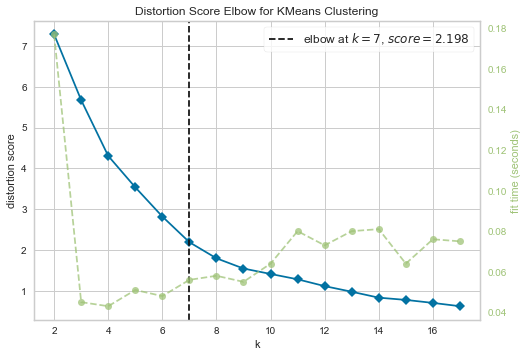

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [9]:
X_train=df_est.loc[:,:'issues']
from pandas.core.common import random_state
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,18))

X_train=df_est.iloc[:100,:]
visualizer.fit(X_train)     
visualizer.show()

In [15]:
from sklearn.cluster import KMeans
kmeans=KMeans(3)
c=kmeans.fit_predict(df_est.loc[:,:'issues'])
fig=px.scatter_matrix(df_est.loc[:,:'issues'],color=c)
fig.show()

(array([44.,  0.,  0.,  0.,  0.,  5.,  0.,  0.,  0.,  1.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

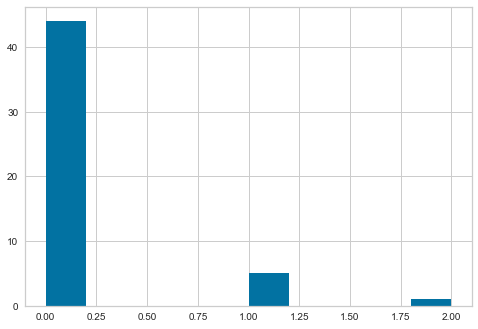

In [16]:
plt.hist(c)

In [12]:
repos[c == 2].sort_values('stargazers')

,stargazers,watchers,forks,tamaño_kb,issues
30,699,82,492,150,105
9,701,72,153,218005,160
19,702,123,485,221041,9
39,702,108,331,70358,80


Pensar otros atributos que regresen cosas menos obvias
Pensar en atributos de la segunda parte y ver como sacarlos en github
- fuerza de seguidores (owner del repo ir a los seguidores de cada uno de ellos sacar numero de repositorios o el numero promedio de estrellas y así, estrellas de repo más exitoso)
- seguidores de seguidores
- fuerza de los que te siguen
- historia de repositorios que ya tenemos  (estrellas, forks y lo que de el api)
- 

In [18]:
# etiquetando el conjunto de datos
repos_df['clase'] = c

In [23]:
repos_df.head()

,ids,name_repo,stargazers,watchers,languages,forks,tamaño_kb,issues,network_size,star_q1,star_gq2,star_gq3,star_gq4,fork_q1,fork_gq2,fork_gq3,fork_gq4,clase
0,25413198,https://github.com/goburrow/modbus,713,51,Go,277,110,45,277,170.25,2.0999,1.4874,1.339,67.25,1.9703,1.5,1.3333,0
1,2037955,https://github.com/rcongiu/Hive-JSON-Serde,702,60,Java,395,616,66,395,193.75,1.871,1.4572,1.3289,92.0,1.9783,1.4945,1.3235,1
2,344908284,https://github.com/seatgeek/thefuzz,720,12,Python,57,91,15,57,189.0,1.8836,1.5421,1.3115,14.25,1.9298,1.5909,1.3029,0
3,327406312,https://github.com/tailwindlabs/tailwindcss-li...,726,12,JavaScript,16,214,0,16,315.0,1.4349,1.302,1.2336,4.75,1.7895,1.4412,1.3061,0
4,69060774,https://github.com/nicklockwood/Expression,713,17,Swift,40,679,7,40,323.5,1.4992,1.2546,1.1717,10.5,1.9048,1.525,1.3115,0


In [35]:
# shift + alt + f
test_df = repos_df.loc[:, ['name_repo', 'star_q1', 'star_gq2', 'star_gq3',
                 'star_gq4', 'fork_q1', 'fork_gq2',	'fork_gq3',	'fork_gq4',	'clase']]

In [36]:
test_df.to_csv('../../data/data_etiquetada.csv', index=False)